![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

<font color='blue'>*** Closing interactive sessions to avoid resource issues ***</font>

In [1]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

<font color='blue'>*** Importing all necessary libraries and setting the session parameters ***</font>

In [2]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(8,6)})

<font color='blue'>*** Assigning GPU for the current session ***</font>

In [3]:
import keras
import tensorflow as tf
tf.__version__

from tensorflow.python.client import device_lib, session
print(device_lib.list_local_devices())
session.device="GeForce MX250"

C:\Users\Venkatesh K Govindan\anaconda3\envs\PythonGPU\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15207538711832182494
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3159585177
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10206893008521026529
physical_device_desc: "device: 0, name: GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


<font color='blue'>*** GPU configuration settings for the session ***</font>

In [4]:
gpu_options=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.7)
config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.compat.v1.Session(config=config)

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Change current working directory to project folder (2 mark)

In [6]:
import os 
print('Current working directory: ', os.getcwd())

Current working directory:  C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-12


In [7]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 5A98-DA59

 Directory of C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-12

01-11-2020  07:41    <DIR>          .
01-11-2020  07:41    <DIR>          ..
01-11-2020  00:04    <DIR>          .ipynb_checkpoints
01-11-2020  07:40           379,454 Advance Computer Vision with CNN_R12_Project2_FaceRecognition.ipynb
04-10-2020  23:13       239,352,059 Aligned Face Dataset.zip
04-10-2020  12:34            75,957 Description-ACV- Face Recognition.pdf
01-11-2020  00:04            45,244 Face Recognition on Olivetti Dataset.ipynb
27-10-2020  09:04            18,018 Questions_Notebook_ACV.ipynb
04-10-2020  14:13       580,085,408 vgg_face_weights.h5
               6 File(s)    819,956,140 bytes
               3 Dir(s)  112,123,883,520 bytes free


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [8]:
from zipfile import ZipFile

In [9]:
# Extract all the contents of zip file in current directory
with ZipFile('Aligned Face Dataset.zip', 'r') as zipObj:
    zipObj.extractall()

In [10]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 5A98-DA59

 Directory of C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-12

01-11-2020  07:51    <DIR>          .
01-11-2020  07:51    <DIR>          ..
01-11-2020  00:04    <DIR>          .ipynb_checkpoints
01-11-2020  07:40           379,454 Advance Computer Vision with CNN_R12_Project2_FaceRecognition.ipynb
01-11-2020  07:51    <DIR>          Aligned Face Dataset
04-10-2020  23:13       239,352,059 Aligned Face Dataset.zip
04-10-2020  12:34            75,957 Description-ACV- Face Recognition.pdf
01-11-2020  00:04            45,244 Face Recognition on Olivetti Dataset.ipynb
27-10-2020  09:04            18,018 Questions_Notebook_ACV.ipynb
04-10-2020  14:13       580,085,408 vgg_face_weights.h5
               6 File(s)    819,956,140 bytes
               4 Dir(s)  111,855,579,136 bytes free


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [11]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('Aligned Face Dataset\PINS')

In [12]:
metadata

array([Aligned Face Dataset\PINS\pins_Aaron Paul\Aaron Paul0_262.jpg,
       Aligned Face Dataset\PINS\pins_Aaron Paul\Aaron Paul101_247.jpg,
       Aligned Face Dataset\PINS\pins_Aaron Paul\Aaron Paul101_248.jpg,
       ..., Aligned Face Dataset\PINS\pins_zendaya\zendaya97.jpg,
       Aligned Face Dataset\PINS\pins_zendaya\zendaya98.jpg,
       Aligned Face Dataset\PINS\pins_zendaya\zendaya99.jpg], dtype=object)

In [13]:
metadata.shape

(10770,)

### Define function to load image
- Define a function to load image from the metadata

In [14]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [15]:
metadata[0]

Aligned Face Dataset\PINS\pins_Aaron Paul\Aaron Paul0_262.jpg

In [16]:
sample_img1=load_image(metadata[0].image_path())
sample_img1.shape

(301, 299, 3)

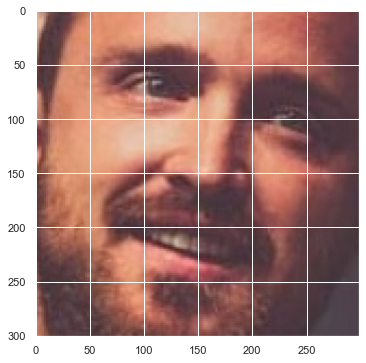

In [17]:
plt.imshow(sample_img1)

In [18]:
sample_img2=load_image(metadata[500].image_path())
sample_img2.shape

(299, 299, 3)

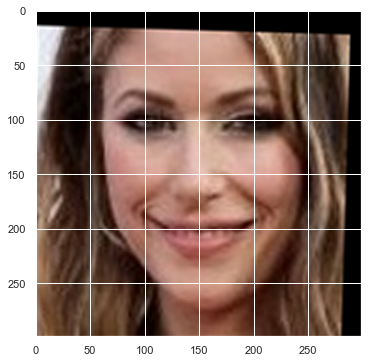

In [19]:
plt.imshow(sample_img2)

<font color='blue'>*** Observation: Images are with different dimensions, which has to be rescaled into 224x224x3 for predefined VGG Face model ***</font>

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [21]:
model=vgg_face()
model.load_weights('vgg_face_weights.h5')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [23]:
from tensorflow.keras.models import Model
vgg_face_descriptor=Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [24]:
vgg_face_descriptor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [25]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)
print('Original Image Size:', img.shape)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print('Rescaled Image Size:', img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print('Embedding Vector Size of a image:', embedding_vector.shape)

Original Image Size: (301, 299, 3)
Rescaled Image Size: (224, 224, 3)
Embedding Vector Size of a image: (2622,)


In [26]:
embedding_vector

array([ 0.03172325, -0.0150453 , -0.01241546, ...,  0.00041373,
        0.00219819, -0.00906623], dtype=float32)

### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [27]:
embeddings = np.zeros((metadata.shape[0], 2622))
start_time=time()
for i, m in enumerate(metadata):
    img=load_image(m.image_path())
    img=(img/255.).astype(np.float32)
    img=cv2.resize(img, dsize=(224,224))
    embedding_vector=vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    if embedding_vector is not None:
        embeddings[i]=embedding_vector
    if i%100==0:
        print('Processed', i, 'images')
end_time=time()
print("Time taken for embedding all images: ", end_time-start_time)

Processed 0 images
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Processed 2000 images
Processed 2100 images
Processed 2200 images
Processed 2300 images
Processed 2400 images
Processed 2500 images
Processed 2600 images
Processed 2700 images
Processed 2800 images
Processed 2900 images
Processed 3000 images
Processed 3100 images
Processed 3200 images
Processed 3300 images
Processed 3400 images
Processed 3500 images
Processed 3600 images
Processed 3700 images
Processed 3800 images
Processed 3900 images
Processed 4000 images
Processed 4100 images
Processed 4200 images
Processed 4300 images
Processed 4400 images
Processed 4500 images


In [28]:
embeddings.shape

(10770, 2622)

In [29]:
from pickle import dump

In [30]:
with open('C:/Users/Venkatesh K Govindan/PGP-AIML/Project/Residency-12/image_embeddings.pkl', 'wb') as embeddings_pickle:
    dump(embeddings, embeddings_pickle)

In [31]:
from pickle import load

In [32]:
embeddings=load(open('C:/Users/Venkatesh K Govindan/PGP-AIML/Project/Residency-12/image_embeddings.pkl', 'rb'))

In [33]:
embeddings.shape

(10770, 2622)

### Dataset visualization with  t-distributed Stochastic Neighbor Embedding (t-SNE)

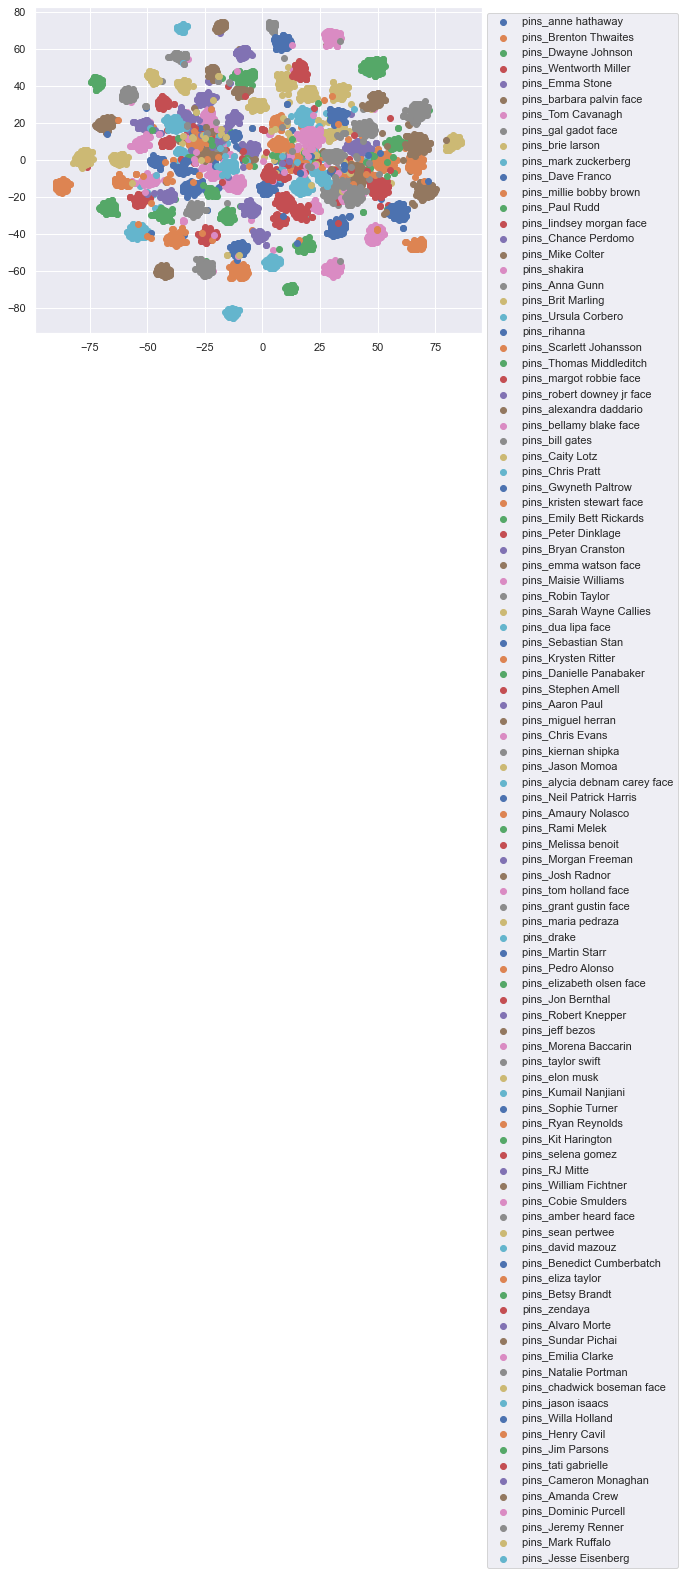

In [119]:
from sklearn.manifold import TSNE

X_embedded=TSNE(n_components=2).fit_transform(embeddings)

for i, t in enumerate(set(targets)):
    idx = targets == t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

plt.legend(bbox_to_anchor=(1, 1));

<font color='blue'>*** Observations: Except from a few outliers, image identity clusters are well separated. </font>

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [34]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

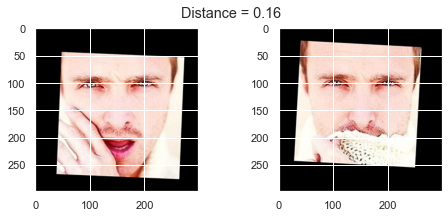

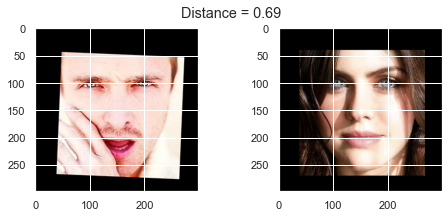

In [35]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

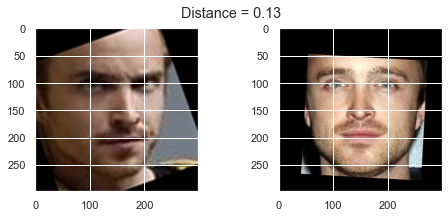

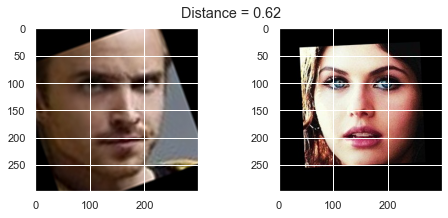

In [36]:
show_pair(30, 31)
show_pair(30, 100)

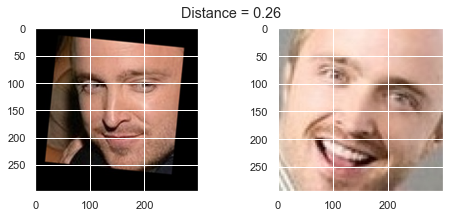

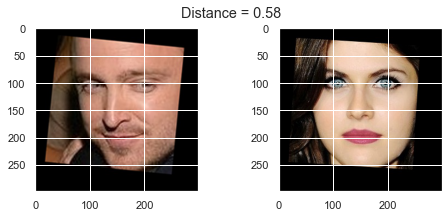

In [37]:
show_pair(70, 72)
show_pair(70, 115)

<font color='blue'>*** Observations: </font>
    
<font color='blue'>
    
1)Squared L2 distance between Anchor-Positive pair is smaller than the distance between Anchor-Negative pair.

2) Distance between images of same or similar people is smallar (say for image pair 2 and 3, it is 0.16). 

3) Distance between images of different people is larger (say for image pair 2 and 180, it is 0.69). 

4) Based on above 3 examples, it is difficult to decide a distance threshold τ which is the best boundary for making a decision between same identity and different identity. 

5) To find the optimal value for τ, the face verification performance must be evaluated on a range of distance threshold values. At a given threshold, all possible embedding vector pairs are classified as either same identity or different identity and compared with the actual </font>

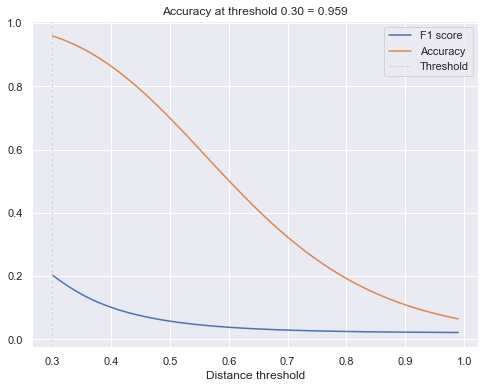

In [46]:
from sklearn.metrics import f1_score, accuracy_score

distances=[] # squared L2 distance between pairs
identical=[] # 1 if same identity, 0 otherwise

num=len(metadata)

for i in range(num - 1):
    for j in range(i + 1, num):
        distances.append(distance(embeddings[i], embeddings[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances=np.array(distances)
identical=np.array(identical)

thresholds=np.arange(0.3, 1.0, 0.01)

f1_scores=[f1_score(identical, distances < t) for t in thresholds]
acc_scores=[accuracy_score(identical, distances < t) for t in thresholds]

opt_idx= np.argmax(f1_scores) # Threshold at maximal F1 score
opt_tau=thresholds[opt_idx]  # Accuracy at maximal F1 score
opt_acc=accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score')
plt.plot(thresholds, acc_scores, label='Accuracy')
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}')
plt.xlabel('Distance threshold')
plt.legend()

<font color='blue'>*** Observations: </font>
    
<font color='blue'>
    
1)We use F1 Score as evaluation metric, since we deal with skewed classes ie.., more Anchor-Negative pairs than Anchor-Positive pairs.

2) The face verification accuracy at distance thershold τ = 0.3 is around 95.9%. </font>

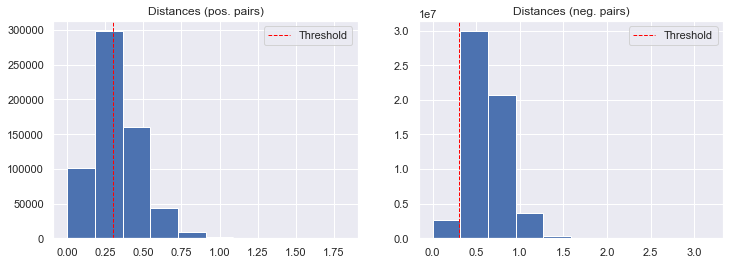

In [49]:
dist_pos=distances[identical == 1]
dist_neg=distances[identical == 0]

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.hist(dist_pos)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='red', label='Threshold')
plt.title('Distances (pos. pairs)')
plt.legend();

plt.subplot(122)
plt.hist(dist_neg)
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='red', label='Threshold')
plt.title('Distances (neg. pairs)')
plt.legend();

<font color='blue'>*** Observations: </font>
    
<font color='blue'>
    
1)These two histograms show the distance distributions of positive and negative pairs and the location of the decision boundary. There is a clear separation of these distributions which explains the discriminative performance of the network. 
    
2) We can spot some strong outliers in the positive pairs class. </font>

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [68]:
train_idx=np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx=np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train=embeddings[train_idx]
# another half as test examples of 10 identities
X_test=embeddings[test_idx]

targets=np.array([m.name for m in metadata])
#train labels
y_train=targets[train_idx]
#test labels
y_test=targets[test_idx]

In [69]:
print(X_train.shape)
print(y_train.shape)

(9573, 2622)
(9573,)


In [70]:
print(X_test.shape)
print(y_test.shape)

(1197, 2622)
(1197,)


In [71]:
X_train[:5]

array([[ 0.03506044, -0.00108772, -0.01245585, ..., -0.01056639,
         0.00174569,  0.02438559],
       [ 0.02813659, -0.00117784, -0.01266475, ..., -0.00913908,
        -0.00583598,  0.02124811],
       [ 0.01505932, -0.00503453, -0.0015726 , ..., -0.00575868,
        -0.00594151,  0.01578084],
       [ 0.03314206, -0.00542431,  0.0006445 , ...,  0.00169134,
        -0.00298186, -0.00014023],
       [ 0.04397825, -0.00303043,  0.00052767, ..., -0.00942944,
        -0.00275615,  0.0123785 ]])

In [72]:
y_train[:5]

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul', 'pins_Aaron Paul'], dtype='<U29')

### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [73]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y_train_encoded=encoder.fit_transform(y_train)
y_test_encoded=encoder.transform(y_test)

In [74]:
y_train_encoded.shape

(9573,)

In [75]:
y_train_encoded

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

In [76]:
y_test_encoded.shape

(1197,)

In [77]:
y_test_encoded

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [78]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  
X_train_scaled=scaler.fit_transform(X_train) 
X_test_scaled=scaler.transform(X_test) 

In [79]:
X_train_scaled.shape

(9573, 2622)

In [80]:
X_train[:5]

array([[ 0.03506044, -0.00108772, -0.01245585, ..., -0.01056639,
         0.00174569,  0.02438559],
       [ 0.02813659, -0.00117784, -0.01266475, ..., -0.00913908,
        -0.00583598,  0.02124811],
       [ 0.01505932, -0.00503453, -0.0015726 , ..., -0.00575868,
        -0.00594151,  0.01578084],
       [ 0.03314206, -0.00542431,  0.0006445 , ...,  0.00169134,
        -0.00298186, -0.00014023],
       [ 0.04397825, -0.00303043,  0.00052767, ..., -0.00942944,
        -0.00275615,  0.0123785 ]])

In [81]:
X_test_scaled.shape

(1197, 2622)

In [83]:
X_test[:5]

array([[ 0.03172325, -0.0150453 , -0.01241546, ...,  0.00041373,
         0.00219819, -0.00906623],
       [ 0.02626053,  0.00147695, -0.00927285, ..., -0.00515147,
         0.00603828,  0.01470517],
       [ 0.02198226, -0.02106837, -0.0023211 , ..., -0.00397251,
         0.00130398,  0.01268389],
       [ 0.03985973, -0.01235488, -0.01627738, ...,  0.00063689,
         0.00046591,  0.01526469],
       [ 0.01890611, -0.01150543, -0.00718773, ..., -0.00608875,
        -0.00189954,  0.01557525]])

### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [84]:
from sklearn.decomposition import PCA

pca=PCA(n_components=128,random_state=1)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=128, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('\nSum of explained variance ratio is:', pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.13585484 0.05364768 0.03993671 0.03690611 0.03409478 0.03140463
 0.02575413 0.02349571 0.02100294 0.01929787 0.01817881 0.01699454
 0.01657564 0.01562494 0.01426484 0.01368898 0.0130499  0.01222572
 0.01149281 0.01133139 0.01088025 0.01063158 0.00966055 0.00940269
 0.00911855 0.0087863  0.00835921 0.00773366 0.00767328 0.00736205
 0.00703727 0.00656912 0.00633748 0.00623217 0.00567537 0.00536873
 0.00531425 0.00514613 0.00501909 0.00485888 0.00443728 0.00430711
 0.00398639 0.00394025 0.00370785 0.00355078 0.00345144 0.00333453
 0.00326188 0.00318742 0.00312403 0.00308742 0.00291231 0.0028188
 0.00278441 0.00272169 0.00270737 0.00263888 0.00251599 0.00250698
 0.00238076 0.00231155 0.00224572 0.0021742  0.00212661 0.00204844
 0.00201456 0.00194167 0.00189102 0.00184517 0.00182311 0.00177282
 0.00175486 0.00172108 0.00167653 0.00165198 0.0016393  0.00160392
 0.00158029 0.00155315 0.00153435 0.00148515 0.00145531 0.00142387
 0.00141104 0.00138581 0.001369   0.0

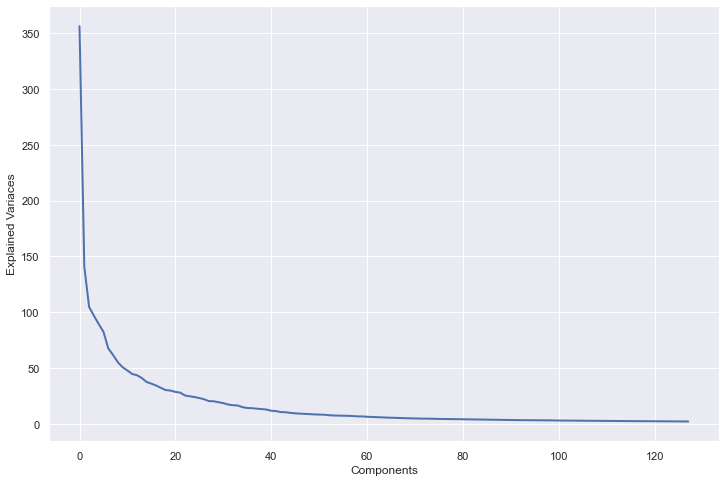

In [92]:
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [87]:
X_train_pca=pca.transform(X_train_scaled)

In [88]:
print(X_train_pca.shape)

(9573, 128)


In [89]:
X_test_pca=pca.transform(X_test_scaled)

In [91]:
print(X_test_pca.shape)

(1197, 128)


<font color='blue'>*** Observations: Feature dimensions were reduced from 2622 to 128. </font>

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [95]:
from sklearn.svm import SVC

SVC_model=SVC(kernel='linear', probability=True)
SVC_model.fit(X_train_pca, y_train_encoded)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
y_train_pred=SVC_model.predict(X_train_pca)

In [97]:
train_score=accuracy_score(y_train_encoded, y_train_pred)
print('Model training score ->', train_score)

Model training score -> 0.9997910790765695


<font color='blue'>*** Observations: SVM Classifier Accuracy on Training data is around 99.98%. </font>

In [98]:
y_test_pred=SVC_model.predict(X_test_pca)

In [99]:
test_score=accuracy_score(y_test_encoded, y_test_pred)
print('Model testing score ->', test_score)

Model testing score -> 0.9573934837092731


In [100]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test_encoded, y_test_pred)
print(confusion_matrix)

[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 12]]


In [101]:
print(metrics.classification_report(y_test_encoded, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.91      1.00      0.95        10
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        12
           4       0.88      1.00      0.93         7
           5       1.00      0.89      0.94         9
           6       0.88      1.00      0.93         7
           7       1.00      1.00      1.00        14
           8       0.93      1.00      0.97        14
           9       0.90      1.00      0.95         9
          10       0.93      0.93      0.93        14
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        10
          13       0.83      1.00      0.91        10
          14       0.94      1.00      0.97        15
          15       1.00      1.00      1.00        15
          16       0.92      1.00      0.96        12
          17       0.88    

<font color='blue'>*** Observations: SVM Classifier Accuracy on Test data is around 96%. </font>

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [118]:
metadata[test_idx][10]

Aligned Face Dataset\PINS\pins_alexandra daddario\alexandra daddario101.jpg

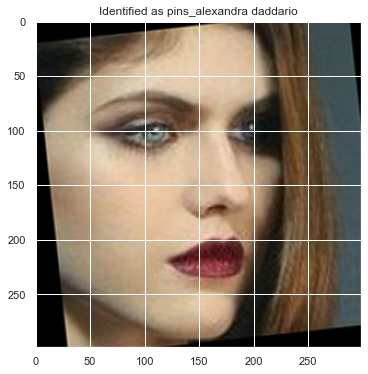

In [117]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = SVC_model.predict([X_test_pca[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

<font color='blue'>*** Observations: Image is correctly idendified as Alexandra Daddario through SVM classifier with PCA applied on feature set. </font>

### Conclusion:

<font color='blue'> * Pretrained VGG_Face model was used to build a face recognition model to identify similar faces. Embedding vectors were generated for each images in the dataset.
* Using image embeddings, face identification was done based on distance thershold and SVM classifier with PCA.
* Distance metric is build by calculating Squared L2 distance for pair of images (Anchor-Positive pair and Anchor-Negative pair). Accuracy of this at distance therhold τ = 0.3 is around 95.9%. Setting this threhold is difficult.
* SVM Classifer accuracy on train set is around 99.98% and on test is around 96%
</font>